In [14]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [36]:
def f(x):
    """ function to approximate by polynomial interpolation"""
    return x**3 - 4*x**2 + 3*x - 2

In [49]:
x_begin = -1
x_end = 3

# generate points used to plot
x_plot = np.linspace(x_begin, x_end+1, 1000)

# generate points and keep a subset of them
x = np.linspace(x_begin, x_end, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = np.zeros(len(x))
for i in range(len(y)):
    y[i] = f(x[i]) + np.random.normal(0, 0.5)

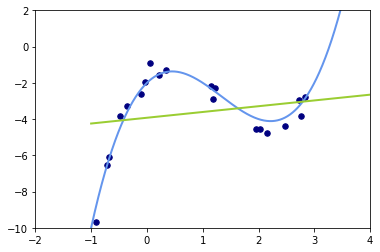

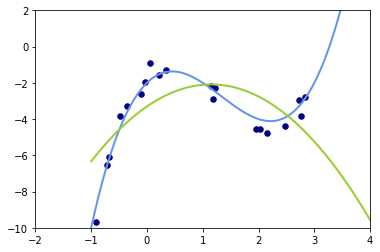

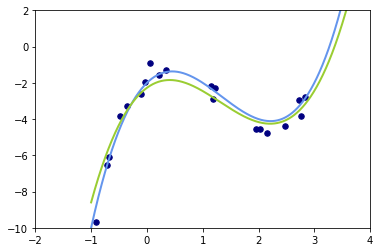

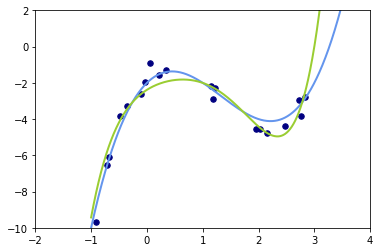

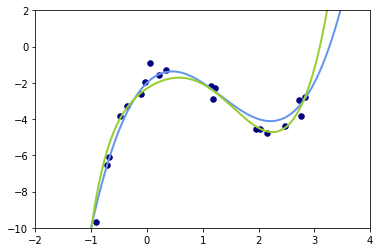

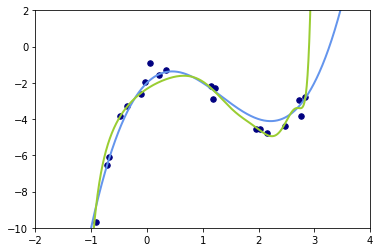

D:\Users\maxim\Anaconda3\envs\maxim\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


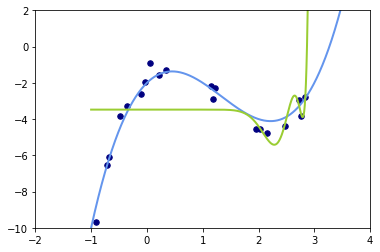

In [51]:
# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

lw = 2

for count, degree in enumerate([1, 2, 3, 5, 7, 15, 21]):
    fig, ax = plt.subplots()
    ax.axis([x_begin-1, x_end+1, -10, 2])
    ax.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
    ax.scatter(x, y, color='navy', s=30, marker='o', label="training points")
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    ax.plot(x_plot, y_plot, color='yellowgreen', linewidth=lw,
             label="degree %d" % degree)
    plt.show()
